<font size=5>**Cleaning the data**</font>


We want to display each datasheet and table as a DataFrame such that to be clearer when it's needed to read and to handle the missing values. 


The missing values will also be displayed, and after that we will calculate how much percentage from the data is missing and why, and if there is a way of handling the missing data.


In [173]:
import pandas as pd

file_path = 'Overdose1999-2021.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Iterate over each sheet in the file
for sheet_name, df in sheets_dict.items():
    
    print(f"{sheet_name}")
    display(df)


Rate Drug OD Deaths


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2015-2021 Fold Change,Unnamed: 25
0,Total Overdose Deaths,6.1,6.2,6.8,8.2,8.9,9.4,10.1,11.5,11.9,...,14.7,16.3,19.8,21.7,20.7,21.6,28.3,32.4,2.0,NaN
1,Female,3.9,4.1,4.6,5.8,6.4,6.9,7.3,8.2,8.8,...,11.1,11.8,13.4,14.4,13.6,13.7,17.1,19.6,1.7,NaN
2,Male,8.2,8.3,9.0,10.6,11.5,11.8,12.8,14.8,14.9,...,18.3,20.8,26.2,29.1,27.9,29.6,39.5,45.1,2.2,NaN
3,Any Opioid1,2.9,3.0,3.3,4.1,4.5,4.7,5.1,5.9,6.1,...,9.0,10.4,13.3,14.9,14.6,15.5,21.4,24.7,2.4,2015-2021 Fold Change
4,Female,1.4,1.6,1.9,2.6,2.8,3.1,3.4,3.9,4.3,...,6.3,7.1,8.5,9.4,9.0,9.3,12.3,14.5,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Female,NaN,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.3,0.3,0.3,0.4,0.4,0.5,0.7,0.8,2.7,1
98,Male,NaN,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.2,0.3,0.5,0.4,0.5,0.8,0.8,4.0,1.2
99,Antidepressants WITHOUT Synthetic Opioids othe...,NaN,NaN,0.6,0.7,0.8,0.8,0.8,0.9,1.0,...,1.3,1.2,1.1,1.2,1.1,1.0,1.0,0.9,0.8,1.3
100,Female,NaN,0.6,0.6,0.8,0.8,0.9,0.9,1.1,1.1,...,1.4,1.4,1.4,1.4,1.3,1.2,1.1,1.1,0.8,2.7


Rate Drug OD, 15-24 Years


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,3.2,3.7,4.2,5.1,6.0,6.6,6.9,8.1,8.2,...,8.3,8.6,9.7,12.4,12.6,10.8,11.2,16.7,17.2,1.8
1,Female,1.8,1.9,2.2,2.8,3.1,3.3,3.5,3.9,4.2,...,4.8,5.0,5.9,7.0,7.9,7.1,7.0,9.6,11.0,1.9
2,Male,4.5,5.3,6.1,7.3,8.8,9.6,10.0,12.0,12.0,...,11.7,12.1,13.3,17.5,17.1,14.3,15.2,23.5,23.3,1.8
3,Any Opioid1,1.6,1.9,2.3,2.9,3.4,3.8,4.0,4.9,5.0,...,5.7,6.2,7.0,9.3,9.5,8.4,8.7,14.1,14.6,2.1
4,Female,0.7,0.7,1.0,1.4,1.5,1.6,1.8,2.1,2.3,...,3.0,3.3,4.1,4.9,5.7,5.2,5.1,7.6,8.8,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,NaN,NaN,0.1,0.1,0.2,0.1,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.4,2.0
62,Male,NaN,NaN,0.1,0.1,0.1,0.2,0.2,0.1,0.2,...,0.3,0.3,0.2,0.3,0.3,0.3,0.3,0.4,0.4,2.0
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,0.2,0.2,0.3,0.3,3.0,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.1,NaN,0.1,0.2,0.2,0.2,0.3,3.0


Rate Drug OD by Demographics


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,6.1,6.2,6.8,8.2,8.9,9.4,10.1,11.5,11.9,...,13.8,14.7,16.3,19.8,21.7,20.7,21.6,28.3,32.4,2.0
1,Female,3.9,4.1,4.6,5.8,6.4,6.9,7.3,8.2,8.8,...,10.6,11.1,11.8,13.4,14.4,13.6,13.7,17.1,19.6,1.7
2,Male,8.2,8.3,9.0,10.6,11.5,11.8,12.8,14.8,14.9,...,17.0,18.3,20.8,26.2,29.1,27.9,29.6,39.5,45.1,2.2
3,White (Non-Hispanic),6.2,6.6,7.4,9.2,10.2,11.0,11.8,13.6,14.5,...,17.6,19.0,21.1,25.3,27.5,25.9,26.2,33.1,36.8,1.7
4,Female,4.3,4.5,5.3,6.8,7.5,8.3,8.8,10.0,11.0,...,13.8,14.6,15.8,17.7,19.1,18.0,17.6,21.5,23.8,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Black (Non-Hispanic),0.1,NaN,NaN,0.1,0.1,0.1,0.2,0.2,0.2,...,0.4,0.5,0.8,1.2,1.6,2.2,2.9,5.1,7.2,9.0
80,Asian* (Non-Hispanic),NaN,0.2,0.2,0.3,0.2,0.3,0.3,0.2,0.3,...,0.5,0.7,0.8,1.0,0.9,1.0,1.4,1.5,NaN,NaN
81,Native Hawaiian or Other Pacific Islander* (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.4,6.6,9.0,11.8,NaN,NaN,NaN,NaN,NaN
82,Hispanic,0.2,0.2,0.2,0.3,0.4,0.4,0.5,0.5,0.4,...,0.9,1.0,1.4,1.5,2.0,2.5,3.1,4.7,6.4,4.6


Number Drug OD Deaths 


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2015-2021 Fold Change
0,Total Overdose Deaths,16849,17415,19394,23518,25785,27424,29813,34425,36010,...,43982,47055,52404,63632,70237,67367,70630,91799,106699,2.0
1,Female,5591,5852,6736,8490,9386,10304,11089,12532,13712,...,17183,18243,19447,22074,23685,22426,22749,28071,32398,1.7
2,Male,11258,11563,12658,15028,16399,17120,18724,21893,22298,...,26799,28812,32957,41558,46552,44941,47881,63728,74301,2.3
3,Any Opioid1,8050,8407,9496,11920,12940,13756,14918,17545,18516,...,25052,28647,33091,42249,47600,46802,49860,68630,80411,2.4
4,Female,2057,2264,2767,3760,4138,4643,5161,5945,6581,...,9055,10227,11420,13751,15263,14724,15225,19970,23654,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Female,61,77,79,154,139,164,159,176,203,...,348,437,463,529,692,704,887,1149,1347,2.9
99,Male,61,46,68,84,91,100,119,124,89,...,223,286,345,473,722,719,823,1238,1374,4.0
100,Antidepressants WITHOUT Synthetic Opioids othe...,1627,1675,1870,2132,2282,2494,2583,2833,3133,...,3887,4045,4086,3810,3855,3641,3465,3210,3138,0.8
101,Female,865,907,930,1164,1245,1385,1416,1643,1755,...,2325,2420,2446,2306,2420,2289,2161,1973,1996,0.8


Overdose1999-2021


,Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1240.0,1435.0,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,346.0,369.0,438.0,560.0,632.0,683.0,733.0,820.0,883.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,894.0,1066.0,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,621.0,728.0,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,141.0,140.0,203.0,269.0,306.0,333.0,371.0,444.0,491.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,NaN,NaN,28.0,28.0,33.0,24.0,33.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,NaN,NaN,26.0,29.0,29.0,41.0,46.0,28.0,55.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,...,86.0,122.0,145.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


In [174]:
def check_missing_values(df):
    missing_columns = [col for col in df.columns if df[col].isnull().any()]
    missingvalues_count =df.isna().sum()
    missingValues_df = pd.DataFrame(missingvalues_count.rename('Missing Values')).loc[missingvalues_count.ne(0)]
    missingValues_df['Percentage'] = missingValues_df['Missing Values'] * 100 / df.shape[0]
    return missingValues_df

In [175]:
# Iterate over each sheet in the file
for sheet_name, df in sheets_dict.items():
    print(f"{sheet_name}")
    # print(df.dtypes)
    categorical_features = df.select_dtypes('object').columns
    # print(categorical_features)
    numerical_features= df.select_dtypes('number').columns
    # print(numerical_features)
    num_duplicates = df.duplicated().sum()
    # print("Number of duplicate rows: ", num_duplicates)
    df_dropped = check_missing_values(df)
    display(df_dropped.sort_values(by='Missing Values', ascending=False))
#     Dropping columns having percentage of missing values abobe a threshold
# We try with dropping columns having a 30% (threshold can be adjusted) missing data. The modified dataframe is later stored in a new one (*df_train_dropped_columns*)
    df_train_dropped_columns = df.drop(columns=df.columns[df.isnull().mean() > 0.3])
    print("No. of columns before dropping: ", df.shape[1] )
    print("No. of columns after dropping: ", df_train_dropped_columns.shape[1] )
    print(df.shape[1]- df_train_dropped_columns.shape[1]," columns dropped")

    # Identify which columns were dropped
    dropped_columns = df.columns.difference(df_train_dropped_columns.columns)
    print(dropped_columns)

Rate Drug OD Deaths


,Missing Values,Percentage
1999,35,34.313725
2000,31,30.392157
2001,23,22.549020
2002,18,17.647059
2003,16,15.686275
2004,16,15.686275
2005,16,15.686275
2007,13,12.745098
2008,13,12.745098
2009,13,12.745098


No. of columns before dropping:  26
No. of columns after dropping:  24
2  columns dropped
Index([1999, 2000], dtype='object')
Rate Drug OD, 15-24 Years


,Missing Values,Percentage
1999,26,39.393939
2000,25,37.878788
2001,22,33.333333
2002,19,28.787879
2004,19,28.787879
2003,17,25.757576
2007,17,25.757576
2005,16,24.242424
2006,16,24.242424
2008,16,24.242424


No. of columns before dropping:  25
No. of columns after dropping:  22
3  columns dropped
Index([1999, 2000, 2001], dtype='object')
Rate Drug OD by Demographics


,Missing Values,Percentage
Fold Change 2015 to 2021,23,27.380952
1999,22,26.190476
2000,20,23.809524
2001,18,21.428571
2021,18,21.428571
2002,17,20.238095
2003,17,20.238095
2005,17,20.238095
2004,16,19.047619
2006,16,19.047619


No. of columns before dropping:  25
No. of columns after dropping:  25
0  columns dropped
Index([], dtype='object')
Number Drug OD Deaths 


,Missing Values,Percentage


No. of columns before dropping:  25
No. of columns after dropping:  25
0  columns dropped
Index([], dtype='object')
Overdose1999-2021


,Missing Values,Percentage
1999,23,34.848485
2000,22,33.333333
2001,19,28.787879
2002,19,28.787879
2003,17,25.757576
2004,17,25.757576
2005,16,24.242424
2006,13,19.696970
2007,13,19.696970
2008,12,18.181818


No. of columns before dropping:  25
No. of columns after dropping:  23
2  columns dropped
Index([1999, 2000], dtype='object')


In [176]:
display(df_train_dropped_columns)

,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,3487.0,3377.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,438.0,560.0,632.0,683.0,733.0,820.0,883.0,848.0,862.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,2639.0,2515.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,2294.0,2229.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,203.0,269.0,306.0,333.0,371.0,444.0,491.0,482.0,521.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,28.0,28.0,33.0,24.0,33.0,37.0,41.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,26.0,29.0,29.0,41.0,46.0,28.0,55.0,57.0,62.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.0,38.0,...,86.0,122.0,145.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


In [177]:
display(df_train_dropped_columns)


,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,3487.0,3377.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,438.0,560.0,632.0,683.0,733.0,820.0,883.0,848.0,862.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,2639.0,2515.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,2294.0,2229.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,203.0,269.0,306.0,333.0,371.0,444.0,491.0,482.0,521.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,NaN,NaN,28.0,28.0,33.0,24.0,33.0,37.0,41.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,26.0,29.0,29.0,41.0,46.0,28.0,55.0,57.0,62.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.0,38.0,...,86.0,122.0,145.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


Further, we mde a copy of the dataframe wth the dropeed columns in order not to mess up the other data. Our data consists of a table with category of drugs that caused death, females deaths and males deaths. Thus we move by row and stay on the same column. We move three steps per column, because of how table is built and we check the following cases in order to see if the missing data can be filled: 

**Case 1**

   We have null values for number female, but number of total death for the respective drug is filled, and the number of males deaths is also filled 
**Solution** : #female deaths = #total drug overdose death - # males death

**Case 2**

   We have null values for number male, but number of total death for the respective drug is filled, and the number of females deaths is also filled 
**Solution** : #male deaths = #total drug overdose death - # females death

**Case 3**

   We have null values for number total overdose death for respective drug, but number of female death for the respective drug is filled, and the number of males deaths is also filled 
**Solution** : #total drug overdose deaths = #females death + # males death
Thus, if we are in one of this cases we can fill the missing values from the data

In [178]:

df1=df_train_dropped_columns.copy()


for i in range(1, 22):
        for j in range (0,66,3):
                if str(df_train_dropped_columns.iloc[j,i])!= "nan": # category is not null
                        if str(df_train_dropped_columns.iloc[j+1,i])!= "nan": # female is not null
                                if str(df_train_dropped_columns.iloc[j+2,i])=="nan":     #male is null 
                                        if (df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+1,i])>=0:
                                             df1.iloc[j+2,i] = df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+1,i]
                                        else: 
                                             df1.iloc[j+2,i]="NaN"
                        else:
                                if str(df_train_dropped_columns.iloc[j+1,i]) == "nan": # female is null but the category is not 
                                      if str(df_train_dropped_columns.iloc[j+2,i])!="nan":
                                        if (df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+2,i])>=0:
                                            df1.iloc[j+1,i] = df_train_dropped_columns.iloc[j,i]-df_train_dropped_columns.iloc[j+2,i]
                                        else :
                                              df1.iloc[j+1,i]="NaN"   
                else : #category is null
                         if str(df_train_dropped_columns.iloc[j+1,i])!= "nan": # female is not null
                                if str(df_train_dropped_columns.iloc[j+2,i])!="nan":# man is not null
                                        if (df_train_dropped_columns.iloc[j+1,i]+ df_train_dropped_columns.iloc[j+2,i] )>=0:
                                          df1.iloc[j,i] = df_train_dropped_columns.iloc[j+1,i]+ df_train_dropped_columns.iloc[j+2,i] #fill with the sum
                                        else :
                                           df1.iloc[j,i]="NaN"

                                           
display(df1)

,Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Fold Change 2015 to 2021
0,Total Overdose Deaths,1700.0,2095.0,2491.0,2751.0,2918.0,3460.0,3550.0,3487.0,3377.0,...,3664.0,3798.0,4235.0,5376.0,5455.0,4633.0,4777.0,7095.0,7426.0,1.8
1,Female,438.0,560.0,632.0,683.0,733.0,820.0,883.0,848.0,862.0,...,1028.0,1075.0,1258.0,1483.0,1663.0,1481.0,1459.0,1990.0,2311.0,1.8
2,Male,1262.0,1535.0,1859.0,2068.0,2185.0,2640.0,2667.0,2639.0,2515.0,...,2636.0,2723.0,2977.0,3893.0,3792.0,3152.0,3318.0,5105.0,5115.0,1.7
3,Any Opioid1,944.0,1179.0,1399.0,1596.0,1685.0,2096.0,2176.0,2294.0,2229.0,...,2486.0,2706.0,3082.0,4027.0,4094.0,3618.0,3725.0,5986.0,6312.0,2.0
4,Female,203.0,269.0,306.0,333.0,371.0,444.0,491.0,482.0,521.0,...,640.0,711.0,871.0,1041.0,1209.0,1091.0,1058.0,1584.0,1866.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Female,12.0,15.0,28.0,28.0,33.0,24.0,33.0,37.0,41.0,...,40.0,49.0,49.0,40.0,51.0,52.0,55.0,53.0,83.0,1.7
62,Male,26.0,29.0,29.0,41.0,46.0,28.0,55.0,57.0,62.0,...,61.0,72.0,55.0,62.0,74.0,71.0,73.0,96.0,89.0,1.6
63,Antidepressants AND Synthetic Opioids other th...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.0,38.0,...,86.0,122.0,145.0,3.8,71.0,81.0,86.0,122.0,145.0,NaN
64,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,26.0,34.0,35.0,44.0,72.0,3.4


In [179]:
ok=1
for i in range (0,23):
    if str(df_train_dropped_columns.iloc[1,i])!= "nan":
        pass
    else:
        ok=0
        break

if (ok==1):
    print("No data missing in total overdosed deaths")
else:
    print("Data missing in total overdose deaths column")

No data missing in total overdosed deaths


Moving on, analysing the data, we can see that sometimes the number of total deaths caused by a specific drug, is smaller than either females death or males deaths. 

Hence, even if we have two of the data filled, we cannot fill in the data. 


In [180]:
count=0
list1=[]
for i in range(1, 22):
        for j in range (0,66,3):
                if str(df1.iloc[j,i])!= "nan": # category is not null
                        if str(df1.iloc[j+1,i])!= "nan" or str(df1.iloc[j+2,i])!="nan":     
                                        if (float(df1.iloc[j+1,i])>float(df1.iloc[j,i])) or (float(df1.iloc[j+2,i])>float(df1.iloc[j,i])):
                                            count=count+1
                                            list1.append(df1.iloc[j,0])
                                            #print(df1.iloc[j,0])
result = [] 
count_dup=0
for i in list1: 
        if i not in result: 
                result.append(i); 
                      
if len(result)>=0:
        print("We have ",len(result),
              " categories where total number of deaths which are either smaller than female deaths or male deaths")
        print()
        for i in range(len(result)):          
                print(result[i])
else:
        print("Everything is alright")


We have  7  categories where total number of deaths which are either smaller than female deaths or male deaths

 Stimulants AND Synthetic Opioids other than Methadone
Cocaine AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Psychostimulants With Abuse Potential AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Heroin AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Antidepressants AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Prescription Opioids AND Synthetic Opioids other than Methadone (primarily fentanyl) 
Benzodiazepines AND Synthetic Opioids other than Methadone (primarily fentanyl) 


Above we can see that we have 7 categories of drugs, together with the name of the drug/medicine, in one of the years,where we have a smaller value in the total number of deaths that a drug caused than number of females/males deaths. 

This may be either a typo in the data by the owner. 

### Time series analysis ###

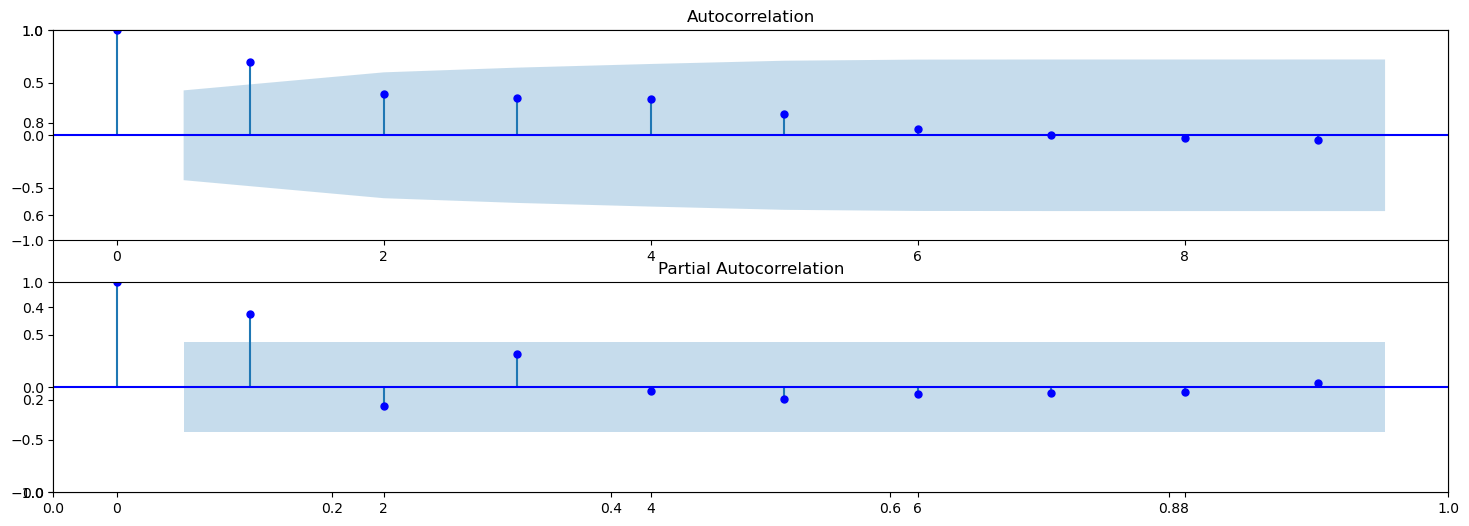

In [217]:
##Technically we should deduce the d p and q from these graphs 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data = {
    'Year': list(range(2001, 2022)),
    'Total Overdose Deaths': [1700.0, 2095.0, 2491.0, 2751.0, 2918.0, 3460.0, 3550.0, 3487.0, 3377.0, 3571.0,
                               3762.0, 3518.0, 3664.0, 3798.0, 4235.0, 5376.0, 5455.0, 4633.0, 4777.0, 7095.0, 7426.0]
}

df_covid = pd.DataFrame(data)
df_covid['Year'] = pd.to_numeric(df_covid['Year'], errors='coerce')

# Filter data for years before and after 2020
before_2020 = df_covid[df_covid['Year'] < 2020]
after_2020 = df_covid[df_covid['Year'] >= 2020]
df3=df_covid.T.copy()
fig, ax = plt.subplots(figsize=(18,6))
ax = fig.add_subplot(211)
fig = plot_acf(df3.iloc[1].dropna(), color = "blue", lags=9, ax=ax)
ax = fig.add_subplot(212)
fig = plot_pacf(df3.iloc[1].dropna(), color = "blue", lags=9, ax=ax)
#plt.savefig('images/stochastic-acf-pacf.png');


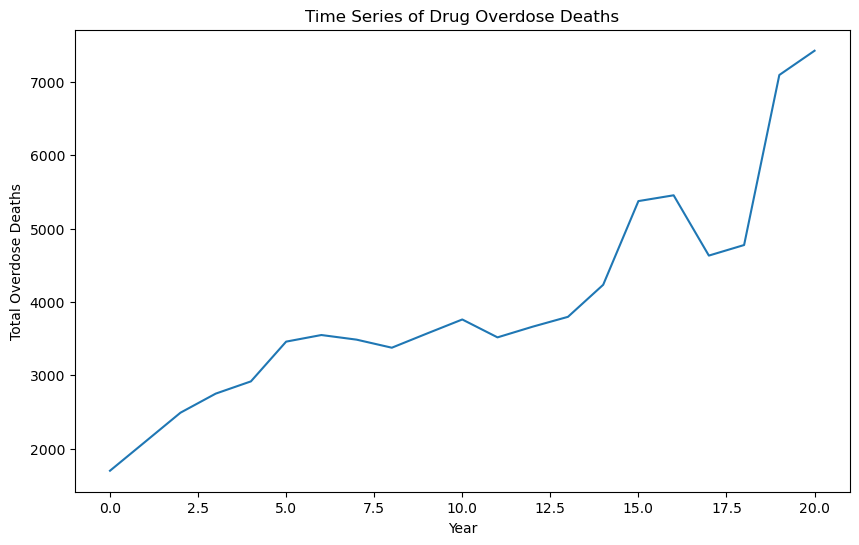

ADF Statistic: -0.5846353351233171
p-value: 0.8744161535087246


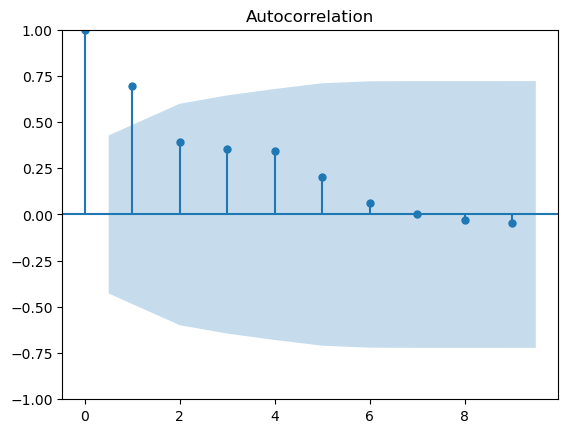

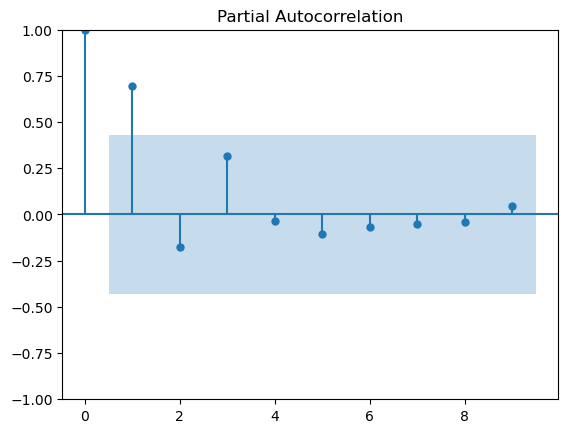

                                 SARIMAX Results                                 
Dep. Variable:     Total Overdose Deaths   No. Observations:                   21
Model:                    ARIMA(1, 1, 0)   Log Likelihood                -157.447
Date:                   Tue, 19 Mar 2024   AIC                            318.894
Time:                           23:15:12   BIC                            320.885
Sample:                                0   HQIC                           319.283
                                    - 21                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2416      0.543      0.445      0.656      -0.823       1.306
sigma2      4.193e+05   7.89e+04      5.312      0.000    2.65e+05    5.74e+05
Ljung-Box (L1) (Q):         

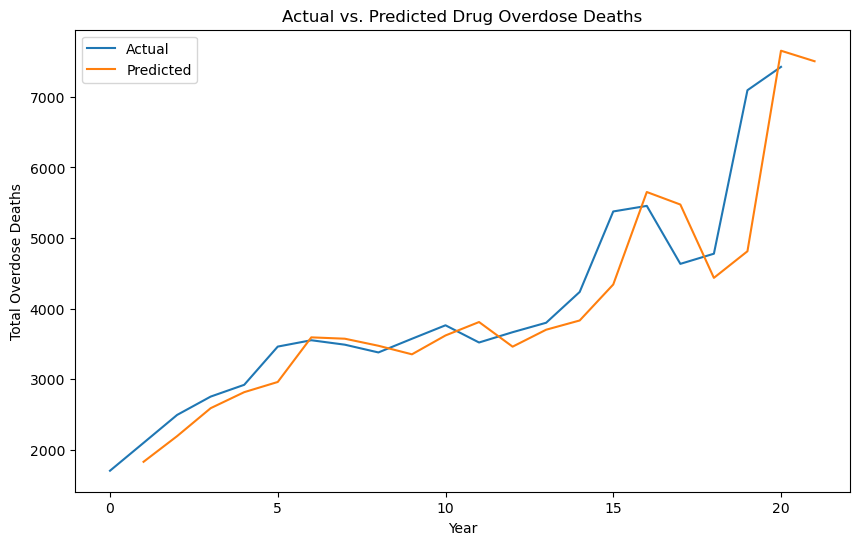

Mean Squared Error: 24601.407734630822
Forecasted values: 21    7505.965671
22    7525.284428
23    7529.951610
24    7531.079146
25    7531.351545
26    7531.417353
27    7531.433252
28    7531.437093
29    7531.438021
30    7531.438245
31    7531.438299
32    7531.438312
33    7531.438315
34    7531.438316
35    7531.438316
36    7531.438316
37    7531.438316
38    7531.438316
39    7531.438316
40    7531.438316
Name: predicted_mean, dtype: float64


In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load the time series data of drug overdose deaths
# Assuming df_covid is your DataFrame with the provided data
# Ensure 'Year' is set as the index of the DataFrame
# Convert 'Total Overdose Deaths' to a time series object if not already
data = {
    'Year': list(range(2001, 2022)),
    'Total Overdose Deaths': [1700.0, 2095.0, 2491.0, 2751.0, 2918.0, 3460.0, 3550.0, 3487.0, 3377.0, 3571.0,
                               3762.0, 3518.0, 3664.0, 3798.0, 4235.0, 5376.0, 5455.0, 4633.0, 4777.0, 7095.0, 7426.0]
}

df_covid = pd.DataFrame(data)
df_covid['Year'] = pd.to_numeric(df_covid['Year'], errors='coerce')

# Filter data for years before and after 2020
before_2020 = df_covid[df_covid['Year'] < 2020]
after_2020 = df_covid[df_covid['Year'] >= 2020]
ts_data = df_covid['Total Overdose Deaths']

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(ts_data)
plt.xlabel('Year')
plt.ylabel('Total Overdose Deaths')
plt.title('Time Series of Drug Overdose Deaths')
plt.show()
i
# Perform Augmented Dickey-Fuller test for stationarity
adf_result = adfuller(ts_data)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Plot ACF and PACF to identify ARIMA parameters
plot_acf(ts_data, lags=9)
plot_pacf(ts_data, lags=9)
plt.show()

# Define ARIMA parameters based on ACF and PACF plots
p = 1# AutoRegressive (AR) order
d = 1# Integrated (I) order
q = 0 # Moving Average (MA) order

# Fit ARIMA model
arima_model = ARIMA(ts_data, order=(p, d, q))
arima_result = arima_model.fit()

# Get summary of ARIMA model
print(arima_result.summary())

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Actual')
plt.plot(arima_result.predict(start=1, end=len(ts_data)), label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Overdose Deaths')
plt.title('Actual vs. Predicted Drug Overdose Deaths')
plt.legend()
plt.show()

# Evaluate ARIMA model performance
mse = mean_squared_error(ts_data, arima_result.predict(start=1, end=len(ts_data)))
print('Mean Squared Error:', mse)

# Forecast future values
forecast_steps = 20  # Number of steps to forecast
forecast = arima_result.forecast(steps=forecast_steps)
print('Forecasted values:', forecast)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

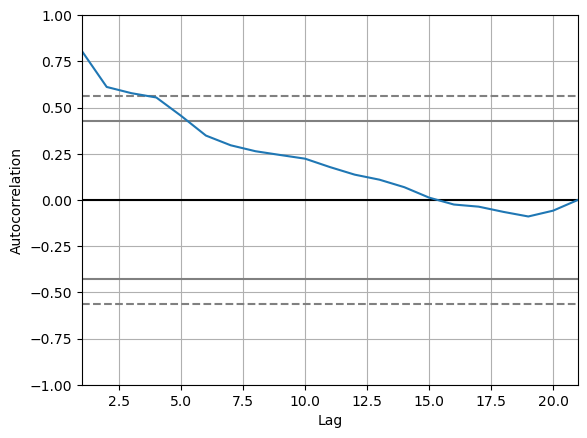

In [184]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(df_covid)